<a href="https://colab.research.google.com/github/MATHONSIMM/Data-Science-Group-Project/blob/main/Practice_Codes_American_call_delta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def american_put_option_price(S0, K, r, T, N, u, d):
    # Calculate the necessary parameters
    dt = T / N
    q = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    # Initialize asset prices at maturity
    ST = np.zeros(N + 1)
    for i in range(N + 1):
        ST[i] = S0 * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(K - ST, 0)

    # Work backwards through the tree
    for t in range(N - 1, -1, -1):
        for i in range(t + 1):
            ST[i] = S0 * (u ** (t - i)) * (d ** i)
            hold = discount * (q * option_values[i] + (1 - q) * option_values[i + 1])
            exercise = K - ST[i]
            option_values[i] = np.maximum(hold, exercise)

    return option_values[0]

# Parameters
S0 = 36
K = 31
r = 0
T = 5  # 1 year
N = 5
u = 1.5
d = 1/1.5

price = american_put_option_price(S0, K, r, T, N, u, d)
price


9.731520000000003

American Put

In [ ]:
import numpy as np
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
price, C, S, delta = american_option(45, 45, 60, 0.1, 1.2, 0.8, 60, "P")
price

2.517430909012516

American call delta

In [ ]:
def american_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
price, C, S, delta = american_option(45, 45, 5, 0, 1.2, 1/1.2, 5, "C")

delta

array([[0.58475887, 0.        , 0.        , 0.        , 0.        ],
       [0.38358036, 0.75240762, 0.        , 0.        , 0.        ],
       [0.162284  , 0.56799399, 0.90608565, 0.        , 0.        ],
       [0.        , 0.29752066, 0.79338843, 1.        , 0.        ],
       [0.        , 0.        , 0.54545455, 1.        , 1.        ]])

Asian Call

In [ ]:
def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros([M])  # Asian prices
    S = np.zeros([M, N + 1])  # underlying price
    S[:, 0] = S_ini

    for j in range(0, M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
                Total = Total + S[j, i]
            else:
                S[j, i] = S[j, i - 1] * d
                Total = Total + S[j, i]

        Asian[j] = np.exp(-r * T) * max(Total / (N + 1) - K, 0)

    return S, Asian

In [ ]:
S, Asian = asian_option_mc(100, 90, 2, 0, 0.3, 2, 10000)

In [ ]:
print(np.mean(Asian))

14.626548381305835


In [ ]:
M = np.arange(1000, 16000, 1000)
asian_price = []

In [ ]:
import numpy as np

def asian_option_binomial(S_ini, K, T, r, u, d, N):
    dt = T / N
    p = (np.exp(r * dt) - d) / (u - d)  # risk-neutral probability

    # Initialize the price tree
    S = np.zeros((N + 1, N + 1))
    S[0, 0] = S_ini

    for i in range(1, N + 1):
        S[i, 0] = S[i - 1, 0] * u
        for j in range(1, i + 1):
            S[i, j] = S[i - 1, j - 1] * d

    # Initialize the payoff at maturity
    payoff = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        avg_price = (S[N, :i+1].sum()) / (i + 1)
        payoff[N, i] = max(avg_price - K, 0)

    # Backward induction to find the option price
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            avg_price = (S[i, :j+1].sum() + S[i+1, :j+1].sum()) / (2 * (j + 1))
            payoff[i, j] = np.exp(-r * dt) * (p * payoff[i + 1, j] + (1 - p) * payoff[i + 1, j + 1])

    return payoff[0, 0]

# Parameters
S0 = 60
K = 50
r = 0
T = 2
N = 2
u = 1.3
d = 0.9

price = asian_option_binomial(S0, K, T, r, u, d, N)
price


29.800000000000004

Asian call from gpt

In [ ]:
import numpy as np

def asian_option_binomial(S_ini, K, T, r, u, d, N):
    dt = T / N  # Time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probability

    # Initialize asset prices at each node
    S = np.zeros((N + 1, N + 1))
    S[0, 0] = S_ini

    # Fill the binomial tree with asset prices
    for i in range(1, N + 1):
        for j in range(i + 1):
            S[j, i] = S[0, 0] * (u ** (i - j)) * (d ** j)

    # Initialize option values at each node
    C = np.zeros((N + 1, N + 1))

    # Calculate the payoff at maturity
    for j in range(N + 1):
        avg_price = (S[0, 0] + S[j, N]) / 2  # Average of initial and final prices
        C[j, N] = max(avg_price - K, 0)

    # Perform backward induction to get the option price at t=0
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            avg_price = (S[0, 0] + S[j, i]) / 2  # Average of initial and node prices
            early_exercise_value = max(avg_price - K, 0)
            continuation_value = np.exp(-r * dt) * (p * C[j, i + 1] + (1 - p) * C[j + 1, i + 1])
            C[j, i] = max(early_exercise_value, continuation_value)

    return C[0, 0]

# Parameters
S_ini = 30
K = 50
T = 2
r = 0
u = 1.2
d = 0.9
N = 2

# Calculate the Asian call option price
asian_call_price = asian_option_binomial(S_ini, K, T, r, u, d, N)
print("Asian Call Option Price:", asian_call_price)


Asian Call Option Price: 0.0


European Call delta

In [ ]:
def european_option(S_ini, K, T, r, u, d, N, opttype):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [ ]:
price_euro, C_euro, S_euro, delta_euro = european_option(
    62.5, 55, 3/12, 0.05, 1.2, 0.8, 5, "C"
)
delta_euro

array([[0.72579669, 0.        , 0.        , 0.        , 0.        ],
       [0.44672292, 0.83592034, 0.        , 0.        , 0.        ],
       [0.09194177, 0.58672101, 0.93425542, 0.        , 0.        ],
       [0.        , 0.12822237, 0.76764645, 1.        , 0.        ],
       [0.        , 0.        , 0.17881944, 1.        , 1.        ]])



Compute the payoff at maturity of an Asian call option (the payoff is
defined by the maximum between the average of the underlying values
minus the strike price and zero) if the path is {d,d}. Data: 2-step binomial
tree with u = 1.2, d = 0.8, K = 30, and So = 50.

In [ ]:
# Given data
S0 = 50  # Initial stock price
u = 1.2  # Up factor
d = 0.8  # Down factor
K = 30  # Strike price

# Calculate the prices along the path {d, d}
S1_d = S0 * d
S2_dd = S1_d * d

# Calculate the average price for the path {d, d}
average_price_dd = (S0 + S1_d + S2_dd) / 3

# Calculate the payoff of the Asian call option
payoff_dd = max(average_price_dd - K, 0)

average_price_dd, payoff_dd


(40.666666666666664, 10.666666666666664)

The average price for the path {d, d} is approximately
40.67
40.67, and the payoff at maturity of the Asian call option is approximately
10.67
10.67.

In [ ]:
price, C, S, delta = american_option(45, 45, 5, 0, 1.5, 1/1.5, 5, "P")

In [ ]:
price, C, S, delta = american_option(45, 45, 5, 0, 1.5, 1/1.5, 5, "P")

In [ ]:
delta

array([[-0.31744,  0.     ,  0.     ,  0.     ,  0.     ],
       [-0.5248 , -0.1792 ,  0.     ,  0.     ,  0.     ],
       [-0.784  , -0.352  , -0.064  ,  0.     ,  0.     ],
       [-1.     , -0.64   , -0.16   ,  0.     ,  0.     ],
       [-1.     , -1.     , -0.4    ,  0.     ,  0.     ]])

#**Derivative Pricing M3**

In [ ]:
import numpy as np
nb = 5  # number of periods (T=5)
up = 1.2  # up movement
down = 1 / up  # down movement to force a "recombining tree"
s0 = 100

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # putting together the last period tree underlyings ("nb-period")
res *= s0
print(res)

[ 40.1877572   48.22530864  57.87037037  69.44444444  83.33333333
 100.         120.         144.         172.8        207.36
 248.832     ]


#Monte Carlo

In [ ]:
import numpy as np

def bs_call_mc(S, K, r, sigma, T, t, Ite):
    data = np.zeros([Ite, 2])
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    data[:, 0] = ST - K

    average = np.sum(np.amax(data, axis=1)) / float(Ite)

    return np.exp(-r * (T - t)) * average

# Example usage:
print("Monte Carlo Price:", bs_call_mc(118.75, 122, 0.15, 0.25, 18/12, 0, 3000))

Monte Carlo Price: 26.921993687676565


#Vasicek model

In [ ]:
import numpy as np

# Vasicek model parameters
kappa = 0.25  # speed of mean reversion
theta = 0.02  # long-term mean
sigma = 1.80  # volatility
r0 = 1.875  # initial interest rate
T = 1.0  # time horizon (1 year)
steps = 150  # number of time steps
dt = T / steps  # time increment
np.random.seed(42)  # set the random seed for reproducibility

# Initialize the rate array
rates = np.zeros(steps)
rates[0] = r0

# Simulate the Vasicek process
for t in range(1, steps):
    dz = np.random.normal(0, np.sqrt(dt))
    dr = kappa * (theta - rates[t-1]) * dt + sigma * dz
    rates[t] = rates[t-1] + dr

# Output the rate at the end of the year
interest_rate_in_one_year = rates[-1]
print(f"Interest rate in one year: {interest_rate_in_one_year:.4f}%")


Interest rate in one year: -0.1325%


#MARKOV'S PROPERTY AND GBM
$dS = S_0 \left(\mu dt + \sigma dW_t \right)$

In [ ]:
import numpy as np

X = np.random.randn(100)
np.random.seed(10)
X = np.random.randn(100)
X

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

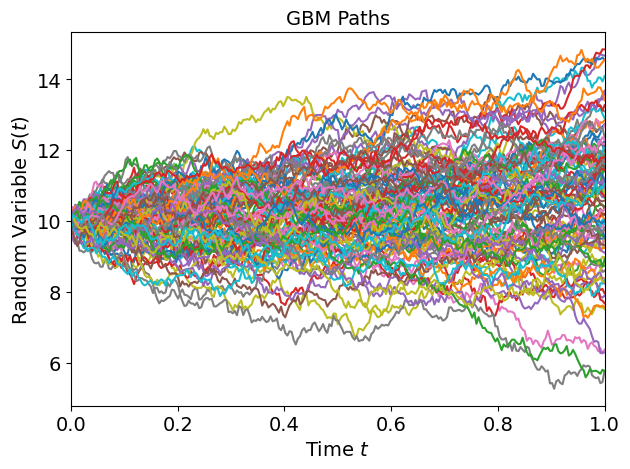

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

T = 1  # years
N = 255  # Number of points, number of subintervals = N-1
dt = T / N  # Time step in "years"
t = np.linspace(0, T, N)
M = 100  # Number of paths (Monte Carlo approach)
vol = 0.18
S0 = 10
mu = 0.08  # drift

dS = S0 * (mu * dt + vol * np.sqrt(dt) * np.random.randn(M, N))
S = S0 + np.cumsum(dS, axis=1)


for i in range(M):
    plt.plot(t, S[i, :])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("Random Variable $S(t)$", fontsize=14)
plt.title("GBM Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

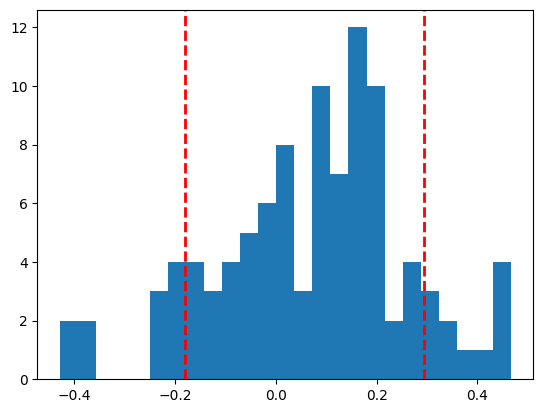

In [ ]:
Returns = (S[:, -1] - S[:, 0]) / S[:, 0]
plt.hist(Returns, bins=25)

plt.axvline(np.percentile(Returns, 10), color="r", linestyle="dashed", linewidth=2)
plt.axvline(np.percentile(Returns, 90), color="r", linestyle="dashed", linewidth=2)

plt.show()

In [ ]:
print(np.percentile(Returns, 5))  # Value at Risk at 5%

-0.2410899590306333


# **ITO'S LEMMA AND BLACK-SCHOLES MODEL**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm

 The Log-Normal Property of Stock Prices

In [ ]:
import yfinance as yf

stocks = yf.Tickers("AAPL AMZN")
hist = stocks.history(start="2000-01-01", end="2021-03-31")
prices = hist["Close"]
prices.tail()

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,AMZN
Date,,
2021-03-24,117.735466,154.353500
2021-03-25,118.225677,152.313004
2021-03-26,118.833519,152.601501
2021-03-29,119.009995,153.786499
2021-03-30,117.549210,152.764496


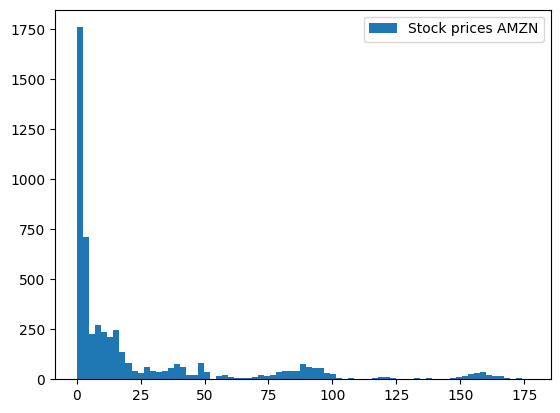

In [ ]:
plt.hist(prices["AMZN"], bins=75, label="Stock prices AMZN")
plt.legend()
plt.show()

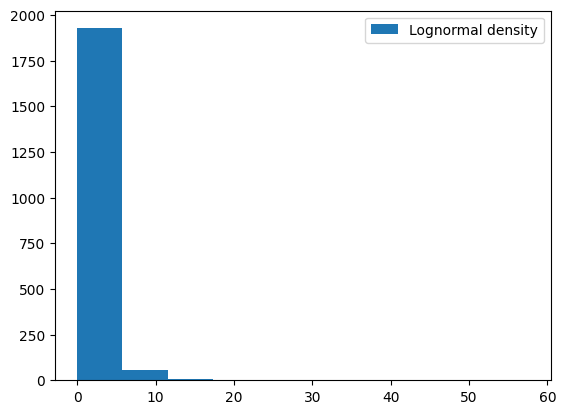

In [ ]:
##log-normal distribution
r = lognorm.rvs(1, size=2000)
plt.hist(r, label="Lognormal density")
plt.legend()
plt.show()

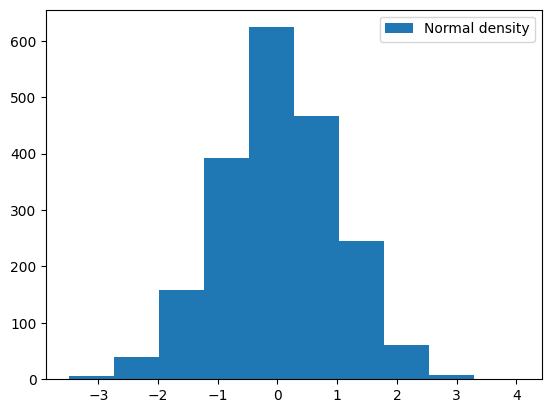

In [ ]:
s = np.log(r)
plt.hist(s, label="Normal density")
plt.legend()
plt.show()

##2. Pricing a Call Option with Black-Scholes

$c = S_0 \mathcal{N}(d_1) - K e^{-rT}\mathcal{N}(d_2) $

function performs to price a call option with:

- $S_0 = 100$
- $r=0$
- $σ=20\%$
- $t=0$
- $T=2$
- $K=105$

In [ ]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res



In [ ]:
print(bs_call_price(S=27.50, r=0.025, sigma=0.45, t=4/12, T=2.0, K=32.5))

5.018982071941327


##3. Greeks

In [ ]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 2/12  # supposed in years. It is not the maturity, but the time to maturity
S = 32.5
K = 35
r = 0.01
vol = 0.45  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 1.4358711443971508
Delta = 0.38114893630731683
Gamma = 0.0638298949263534
Vega = 5.056524488697058
Theta = -6.935822752596936
Rho = 1.825244880931774
